In [2]:

from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib
# matplotlib.use('Qt5Agg',force=True)
# matplotlib.use("TKAgg",force=True)
# matplotlib.use("widget",force=True)
import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np

sys.path.append(r"/users/mjk557/scratch/scripts/sdtools")

from analysis import *
import h2D

%load_ext autoreload
%autoreload 2

In [4]:
# self = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7gt2-barrier3", r"/users/mjk557/scratch/cases/st40-a1.nc", keep_boundaries = False)
# self = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/b1a-fatgrid", r"/users/mjk557/scratch/cases/g3a3-hires.nc", keep_boundaries = False)
self = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/b1b-hflux_source", r"/users/mjk557/scratch/cases/g3a3f1-core_hflux.nc", keep_boundaries = True)

/users/mjk557/scratch/cases/g3a3f1-core_hflux.nc
/users/mjk557/scratch/cases/st40/b1b-hflux_source


/users/mjk557/.local/lib/python3.9/site-packages/xbout/geometries.py:384: UserWarning: rename 't' to 't' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds = ds.rename(t=coordinates["t"])


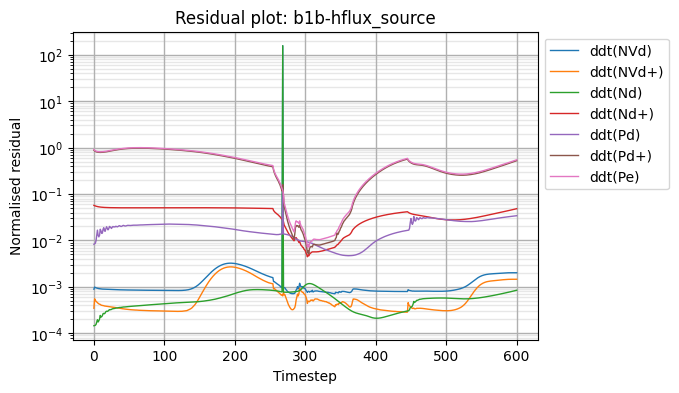

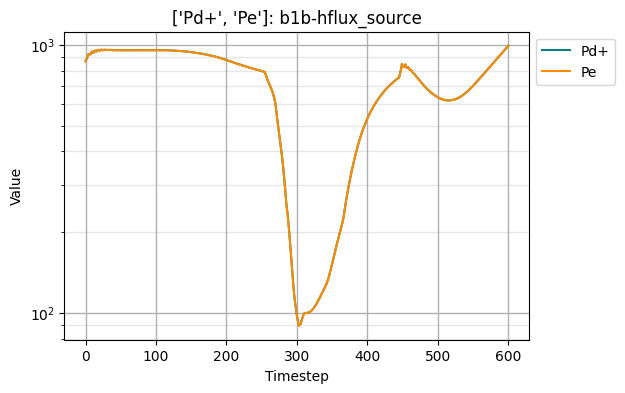

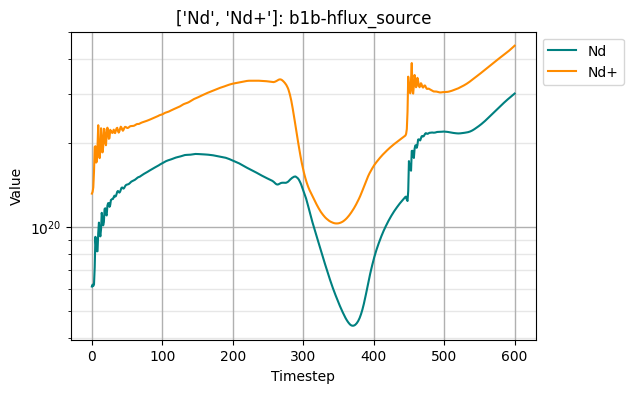

In [7]:
self.plot_ddt(smoothing = 1)
self.plot_monitors(["Pd+", "Pe"], what = ["mean"])
self.plot_monitors(["Nd+", "Nd"], what = "mean")

/users/mjk557/.local/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


[(-0.9, 0.0), (-0.9, 0.0), (-0.9, 0.0), (-0.9, 0.0)]

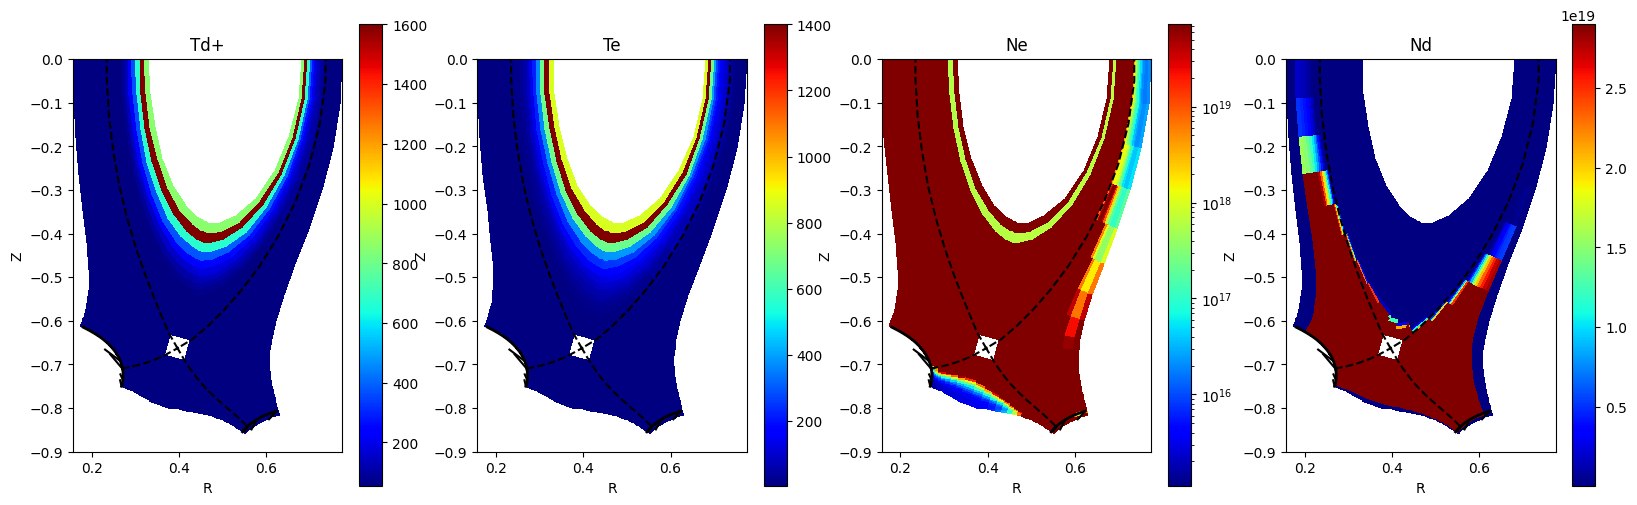

In [6]:
data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*5,6), dpi = 100)

data["Td+"].isel(t=-1).bout.pcolormesh(ax = axes[0], cmap = "jet", logscale = False,
vmin = 53, vmax = 1600, 
)
data["Te"].isel(t=-1).bout.pcolormesh(ax = axes[1], cmap = "jet", logscale = False,
vmin = 2.2, vmax = 1400, 
)
data["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[2], cmap = "jet", logscale = True,
vmin = 1.1e15, vmax = 7.2e19, 
)
data["Nd"].isel(t=-1).bout.pcolormesh(ax = axes[3], cmap = "jet", logscale = False,
vmin = 9.7e13, vmax = 2.9e19, 
)
[ax.set_ylim(-0.9,0) for ax in axes]

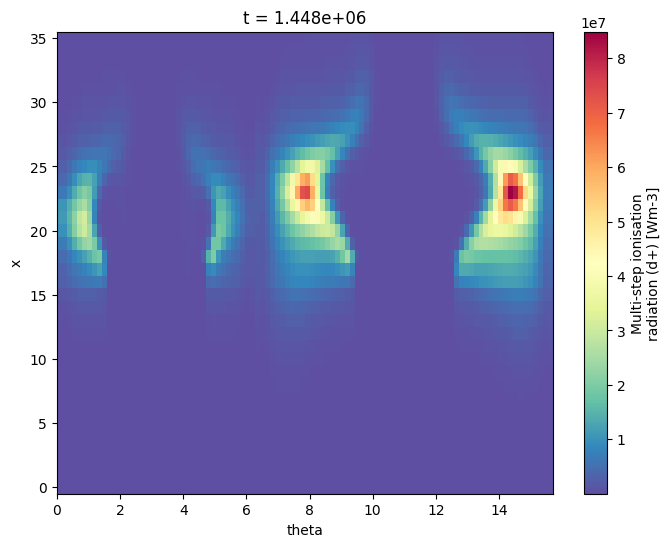

In [13]:
case = self
data = self.ds
# a = data.isel(x = case.slices(f"outer_midplane_a")[0], theta = case.slices(f"outer_midplane_a")[1])
# a = data.isel(x = 20)
a = data.isel(t = -1)

fig, ax = plt.subplots(figsize=(8,6), dpi = 100)
(a["Rd+_ex"]*-1).plot(ax = ax, cmap = "Spectral_r")
# a["Td+"].isel(t=0).plot(ax = ax, label = "First tstep")
# a["Td+"].isel(t=-1).plot(ax = ax, label = "Last tstep")
# ax.legend()

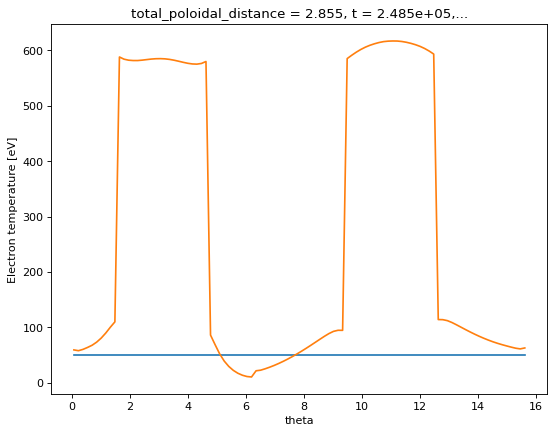

In [6]:
case = self
data = self.ds
a = data.isel(x = 16)
fig, ax = plt.subplots(figsize=(8,6), dpi = 80)
# a["Td+"].plot(ax = ax, cmap = "Spectral_r", color = "k", linewidth = 0.01, vmin = 0, vmax = 400)
a["Te"].isel(t=0).plot(ax = ax, label = "First tstep")
a["Te"].isel(t=-1).plot(ax = ax, label = "Last tstep")
# ax.legend()

In [8]:
x = data["Pd+"].isel(t=-1).values

np.min(x)

3.3490471904078336

In [2]:
# a2e = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a2e-largetimestep", r"/users/mjk557/scratch/cases/st40-a1.nc")
# self = h2D.Case(r"/users/mjk557/scratch/cases/st40/a2eb-disable_dilution", r"/users/mjk557/scratch/cases/st40-a1.nc")
# self = h2D.Case(r"/users/mjk557/scratch/cases/st40/a2ec-comment_dilution", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a2ed = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a2ed-pressure-equation", r"/users/mjk557/scratch/cases/st40-a1.nc")
# self = h2D.Case(r"/users/mjk557/scratch/cases/st40/a2ef-c-only_ii_nn_ee", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a2eg = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a2eg-sndspd-allc", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a2eh = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a2eh-p_div_false", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a2ei = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a2ei-neut_mix_fix", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a2ei = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a5b-10xNT", r"/users/mjk557/scratch/cases/st40-a1.nc")

# a5d = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a5d-10xNT-sndspeed", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a6 = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a6-fromben", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a6b = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a6b-150ev", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a7 = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7-deuterium", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a7b = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7b-allatomics", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a7c = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7c-300ev", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a7cx = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7cx-300ev", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a7cy = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7cy-radialtest", r"/users/mjk557/scratch/cases/st40-a1.nc")
# a7x = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7x-fieldtest", r"/users/mjk557/scratch/cases/st40-a1_fields1.nc")
# del a8a
# a8a.close()
# a8a = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a8a-hflux_sources", r"/users/mjk557/scratch/cases/st40-a1_fields1.nc")
# a7f = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7f-1.6kev", r"/users/mjk557/scratch/cases/st40-a1.nc")
a7g = h2D.Load.case_2D(r"/users/mjk557/scratch/cases/st40/a7g-7m3", r"/users/mjk557/scratch/cases/st40-a1.nc")
# self.diagnose_cvode()

/users/mjk557/scratch/cases/st40-a1.nc
/users/mjk557/scratch/cases/st40/a7g-7m3


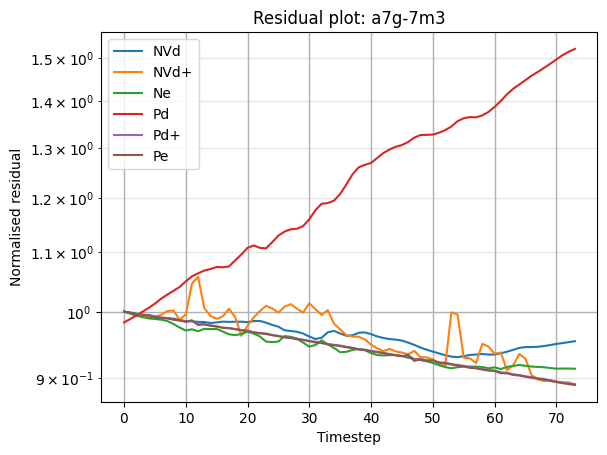

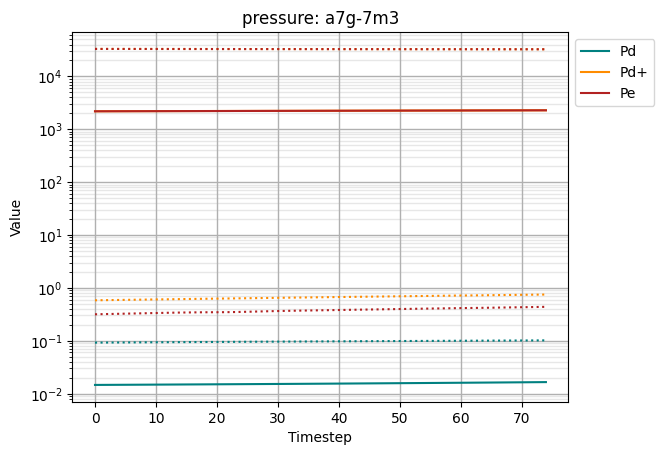

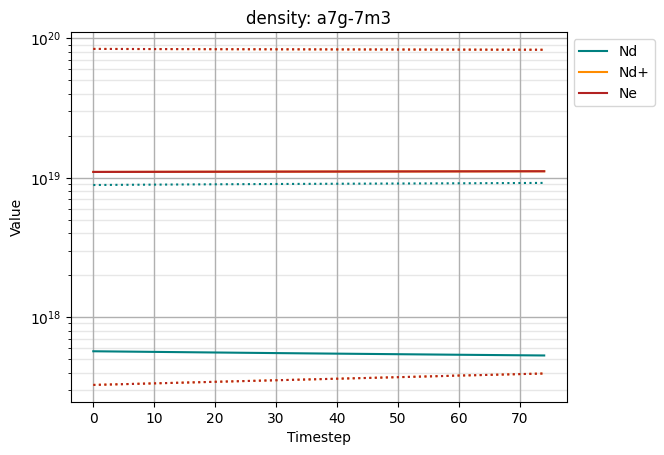

In [3]:
self = a7g


self.plot_residuals()
self.plot_monitors("pressure", ignore = [])
self.plot_monitors("density", ignore = [])

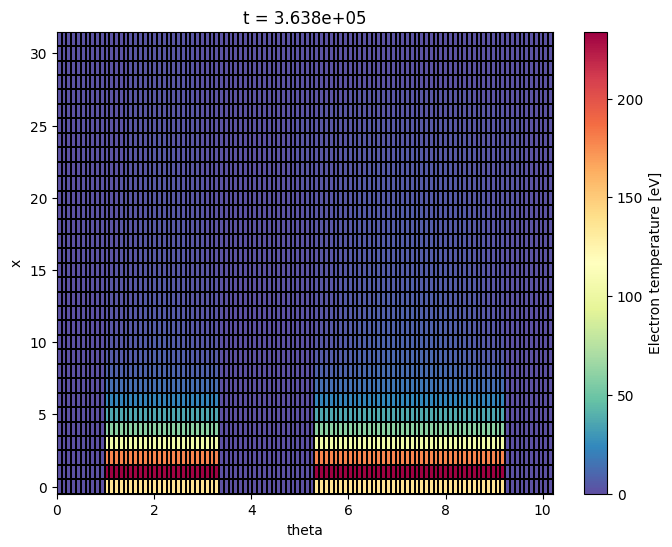

In [4]:
fig, ax = plt.subplots(figsize=(8,6))
self.ds["Td+"].isel(t=-1).plot(ax = ax, cmap = "Spectral_r", color = "k", linewidth = 0.01, vmin = 0, vmax = None)

In [7]:
src = self.ds["Pd+_src"].isel(t=-1).values.flatten()
vol = (self.ds["dx"] * self.ds["dy"] * 2*np.pi * self.ds["J"]).values.flatten()

In [9]:
(src * vol).sum()

999999.9912618874

In [5]:
mesh = DataFile("/users/mjk557/scratch/cases/st40-a1_fields1.nc")

set(mesh["Pd+_src"].flatten())

{0.0, 10230656.391456312}

[(-0.9, 0.0), (-0.9, 0.0), (-0.9, 0.0), (-0.9, 0.0)]

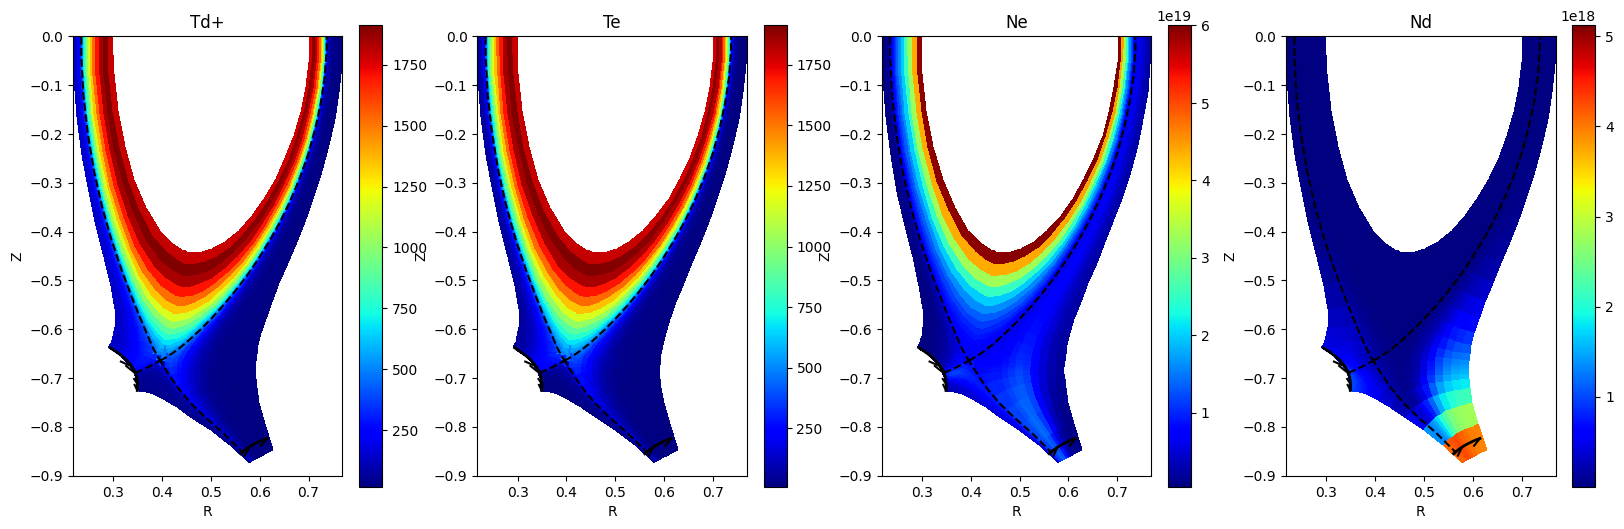

In [4]:
data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*5,6), dpi = 100)

data["Td+"].isel(t=-1).bout.pcolormesh(ax = axes[0], cmap = "jet", logscale = False,
# vmin = 0.1, vmax = 300, 
)
data["Te"].isel(t=-1).bout.pcolormesh(ax = axes[1], cmap = "jet", logscale = False,
# vmin = 0.1, vmax = 300, 
)
data["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[2], cmap = "jet", logscale = False,
# vmin = 0.1, vmax = 10, 
)
data["Nd"].isel(t=-1).bout.pcolormesh(ax = axes[3], cmap = "jet", logscale = False,
# vmin = 0.1, vmax = 10, 
)
[ax.set_ylim(-0.9,0) for ax in axes]

In [6]:
self.ds.coords["t"][-1]

<xarray.DataArray 't' ()>
array(452500.)
Coordinates:
    t        float64 4.525e+05
Attributes:
    metadata:  {'BOUT_VERSION': 5.0, 'iteration': 399, 'zperiod': 1, 'MXSUB':...
    options:   # Tokamak diffusion, parallel conduction, and sheath boundary\...
    regions:   {'lower_inner_PFR': <xbout.region.Region>\n\tname\tlower_inner...
    geometry:  toroidal

[(-0.9, 0.0), (-0.9, 0.0), (-0.9, 0.0), (-0.9, 0.0)]

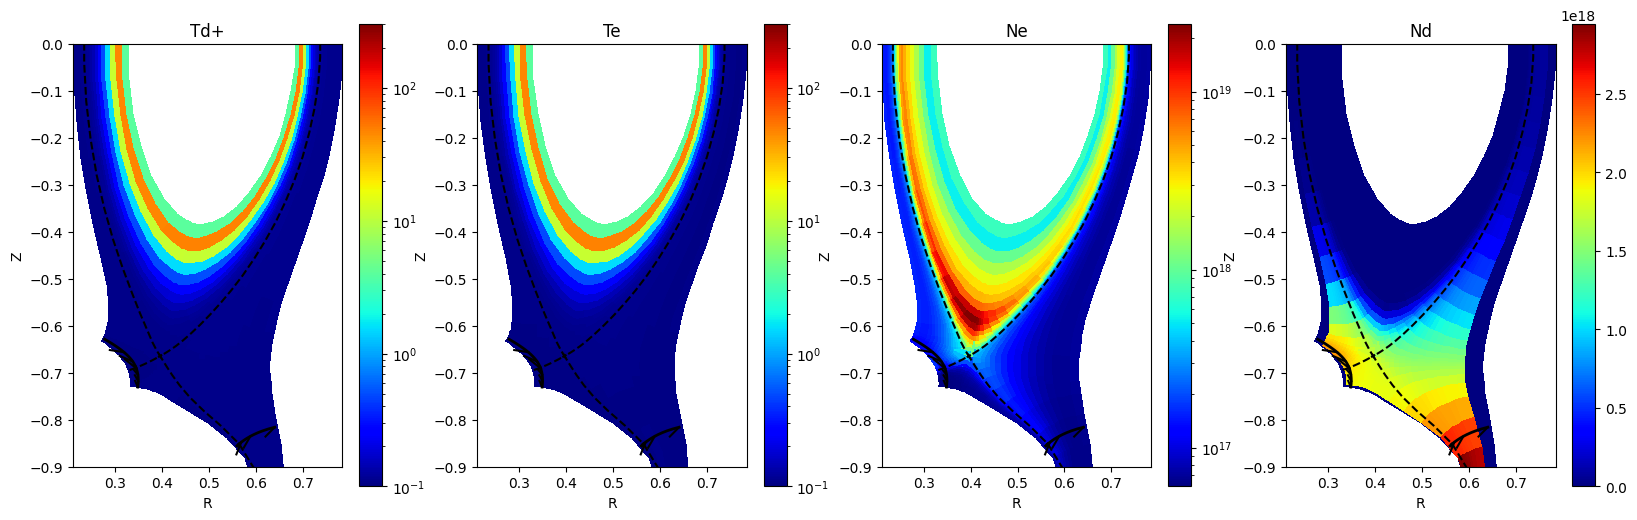

In [4]:
self = a8a

data = self.ds

cols = 4
fig, axes = plt.subplots(1,cols, figsize = (cols*5,6), dpi = 100)

data["Td+"].isel(t=-1).bout.pcolormesh(ax = axes[0], cmap = "jet", logscale = True,
vmin = 0.1, vmax = 300, 
)
data["Te"].isel(t=-1).bout.pcolormesh(ax = axes[1], cmap = "jet", logscale = True,
vmin = 0.1, vmax = 300, 
)
data["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[2], cmap = "jet", logscale = True,
# vmin = 0.1, vmax = 10, 
)
data["Nd"].isel(t=-1).bout.pcolormesh(ax = axes[3], cmap = "jet", logscale = False,
# vmin = 0.1, vmax = 10, 
)
[ax.set_ylim(-0.9,0) for ax in axes]

In [11]:
set(data["Pd+_src"].isel(t=-1).values.flatten())

{0.0,
 0.9999999912618873,
 1.9999999825237746,
 2.999999973785662,
 4.999999956309437}

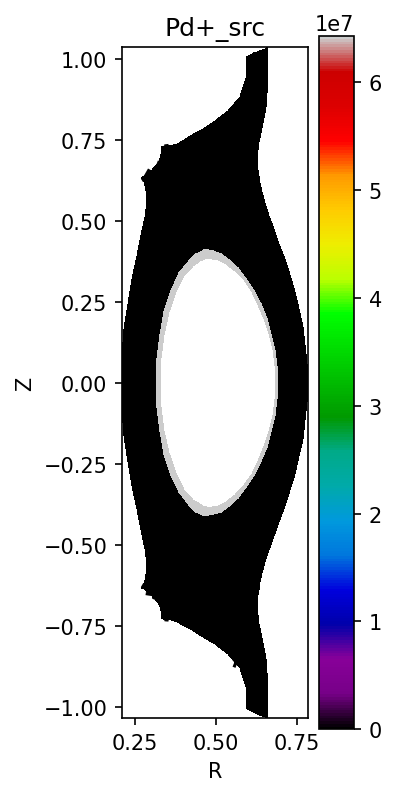

In [3]:
self = a7x

data = self.ds
fig, ax = plt.subplots(figsize = (2,6), dpi = 150)

data["Pd+_src"].isel(t=-1).bout.pcolormesh(ax = ax, cmap = "nipy_spectral", logscale = False,
)
# data["Te"].isel(t=-1).bout.pcolormesh(ax = axes[1], cmap = "jet", logscale = True,
# vmin = 0.1, vmax = 300, 
# )
# data["Ne"].isel(t=-1).bout.pcolormesh(ax = axes[2], cmap = "jet", logscale = True,
# # vmin = 0.1, vmax = 10, 
# )
# data["Nd"].isel(t=-1).bout.pcolormesh(ax = axes[3], cmap = "jet", logscale = False,
# # vmin = 0.1, vmax = 10, 
# )
# [ax.set_ylim(-0.9,0) for ax in axes]

print("")

In [22]:
src = data["Pd+_src"].isel(t=-1)
vol = data["dy"] * data["dx"] * data["J"] * data.metadata["rho_s0"]**3

np.sum(src * vol).values

array(999999.99126189)

In [21]:
np.sum(vol).values

array(0.25782612)

In [17]:
data.metadata

{'BOUT_VERSION': 5.0,
 'iteration': 0,
 'zperiod': 1,
 'MXSUB': 14,
 'MYSUB': 8,
 'MZSUB': 1,
 'MXG': 2,
 'MYG': 2,
 'MZG': 0,
 'nx': 32,
 'ny': 96,
 'nz': 1,
 'MZ': 1,
 'NXPE': 2,
 'NYPE': 12,
 'NZPE': 1,
 'ZMAX': 1.0,
 'ZMIN': 0.0,
 'ixseps1': 16,
 'ixseps2': 16,
 'jyseps1_1': 7,
 'jyseps1_2': 47,
 'jyseps2_1': 31,
 'jyseps2_2': 87,
 'ny_inner': 40,
 'grid_id': 'd2fddbe1-5941-11ed-ad5a-4c034f4e9309',
 'hypnotoad_version': '0.4.4+4.g85a7f4a',
 'hypnotoad_git_hash': '85a7f4a882072427a55e2afa14c3f6e05db44e7c',
 'hypnotoad_git_diff': '',
 'hypnotoad_geqdsk_filename': 'C:/Users/mikek/OneDrive/Project/collab/tech/grid/ST40/first-test/ST40_P3_eq_0015-ogr_geom.geqdsk',
 'has_fftw': 1,
 'has_gettext': 1,
 'has_lapack': 1,
 'has_netcdf': 1,
 'has_legacy_netcdf': 0,
 'has_petsc': 1,
 'has_pretty_function': 1,
 'has_pvode': 1,
 'has_scorep': 0,
 'has_slepc': 0,
 'has_sundials': 1,
 'use_backtrace': 1,
 'use_color': 1,
 'use_openmp': 0,
 'use_output_debug': 0,
 'use_sigfpe': 0,
 'use_signal': 1,


In [13]:
srcvol = (src.values * vol.values)

srcvol.flatten().sum()

2651636038411785.0